In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


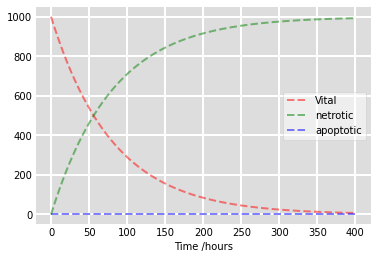

In [2]:
# Initial conditions

V0 = 1000
N0 = 0
A0 = 0

# A grid of time points
t = np.linspace(0, 400, 1000) 

#parameters
Kvn = 0
Kan =  0.04965
Kva = 0.01238
Kav = 0

# The model differential equations.
def deriv(y, t, Kvn, Kan, Kva, Kav):
    V, N, A = y
    dVdt = - (Kva + Kvn) * V + Kav * A
    dAdt = Kva * V - (Kav + Kan) * A
    dNdt = Kvn * V + Kan * A

    return dVdt, dAdt, dNdt


# Initial conditions vector
y0 = V0, N0, A0
# Integrate the equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(Kvn, Kan, Kva, Kav))
V, N, A = ret.T

# Plot the data on two separate curves
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, V, 'red', alpha=0.5, lw=2, label='Vital', linestyle='dashed')
ax.plot(t, N, 'green', alpha=0.5, lw=2, label='netrotic', linestyle='dashed')
ax.plot(t, A, 'blue', alpha=0.5, lw=2, label='apoptotic', linestyle='dashed')

ax.set_xlabel('Time /hours')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [3]:
#save to csv file
a = np.asarray([t, V, A, N]) 

np.savetxt("VAN_CDA_HSB2_-7.csv", a, delimiter=",")